Celem projektu jest opracowanie modelu regresji pokazujacego trend w wybranym przez nas zbiorze danych, wraz z jego analiza eksploracyjna.

Wybralismy zbior danych - Human Resources Data Set (https://www.kaggle.com/datasets/rhuebner/human-resources-data-set) jest to stworzony przez Pania Dr. Carla Patalano i Pana Dr. Rich Huebnera z New England College of Business, do nauki Tableau.

Zbior zawiera imiona i nazwiska, date urodzenia, wiek, plec, stan cywilny, date zatrudnienia, powody rozwiazania umowy, dzial, czy firma jest aktywna czy rozwiazana, stanowisko, stawke wynagrodzenia, nazwisko menedzera, wynik wydajnosci, nieobecnosci, data najnoszej oceny wynikow i wynik zaangazowania pracownikow.

Przykladowe pytania do inspiracji postawienia hipotezy do posiadanych danych podane przez osoby publikujace zbior danych:
1. Czy istnieje zwiazek miedzy tym, dla kogo dana osoba pracuje, a jej wynikami?
2. Jaki jest ogolny profil roznorodnosci organizacji?
3. Jakie sa nasze najlepsze zrodla rekrutacji, jesli chcemy zapewnic zroznicowana organizacje?
4. Czy mozemy przewidziec, kto odejdzie, a kto nie? Jaki poziom dokladnosci mozemy w tym przypadku osiagnac
5. Czy sa obszary firmy, w ktorych wynagrodznie nie jest sprawiedliwe?


In [6]:
# Wczytanie podstawowych bibliotek
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
# Wczytanie danych
dtype_dict = {'Employee_Name': str, 'EmpID': int, 'MarriedID': int, 'MaritalStatusID': int, 'GenderID': int, 'EmpStatusID': int, 'DeptID': int, 'PerfScoreID': int, 'FromDiversityJobFairID': int, 'Salary': int, 'Termd': int, 'PositionID': int, 'Position': str, 'State': str, 'Zip': int, 'DOB': str, 'Sex': str, 'MaritalDesc': str, 'CitizenDesc': str, 'HispanicLatino': str, 'RaceDesc': str, 'DateofHire': str, 'DateofTermination': str, 'TermReason': str, 'EmploymentStatus': str, 'Department': str, 'ManagerName': str, 'ManagerID': float, 'RecruitmentSource': str, 'PerformanceScore': str, 'EngagementSurvey': float, 'EmpSatisfaction': int, 'SpecialProjectsCount': int, 'LastPerformanceReview_Date': str, 'DaysLateLast30': int, 'Absences': int}
data = pd.read_csv('HRDataset_v14.csv', sep=',', dtype=dtype_dict)
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [8]:
# Zamiana dat na obiekty daty
data['DOB'] = data['DOB'].apply(lambda x: x.split('/'))
data['DOB'] = data['DOB'].apply(lambda x: x[0] + '/' + x[1] + '/19' + x[2])
data['DOB'] = pd.to_datetime(data['DOB'], format='%m/%d/%Y')

data['DateofHire'] = pd.to_datetime(data['DateofHire'], format='%m/%d/%Y')
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'], format='%m/%d/%Y')
data['LastPerformanceReview_Date'] = pd.to_datetime(data['LastPerformanceReview_Date'], format='%m/%d/%Y')

# Mozna byloby tez Zamienic daty na liczby, na przyklad wiek, liczbe dni od zatrudnienia itp.

In [9]:
data['Zip'].unique()

array([ 1960,  2148,  1810,  1886,  2169,  1844,  2110,  2199,  1902,
        2062, 78230,  2747,  2050,  2145,  1915,  2026,  2452,  2072,
        2027,  2031,  2171,  2210,  6033,  2468,  1901,  1701,  1450,
        1013,  2043, 21851,  1890,  2184,  2132,  5664,  2763,  2045,
        2170,  1845, 78207,  1775,  2044,  1752,  2134,  1880,  1803,
        2030,  2189,  1821,  6278,  5473,  2458,  2138,  2176, 36006,
        2343,  2061,  2180, 98052,  2351,  2125,  2119, 90007,  1731,
        1749,  2133,  2129,  1824,  2324,  2155,  2143,  2330,  1460,
        6050,  6040,  1905,  2121, 43050,  2451, 46204,  2127,  2135,
        2108,  2128,  2472,  1864, 37129,  2149,  2021,  3062,  2445,
        2493,  2908,  1742,  2081,  1778,  2109,  2301,  2446, 19444,
        1887, 80820,  1721,  1801, 10171,  2090,  2048,  2126,  1776,
       84111,  1770,  6070,  2122,  1938, 78789,  1760,  2346,  2453,
        1550,  2056,  2421,  2136, 30428,  1040,  2152,  2492, 33174,
        2478, 27229,

In [10]:
# Dane takie jak EmpID, Zip, 
data = data.drop(['EmpID', 'Zip', 'ManagerID'], axis=1)

In [11]:
data.columns

Index(['Employee_Name', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   MarriedID                   311 non-null    int32         
 2   MaritalStatusID             311 non-null    int32         
 3   GenderID                    311 non-null    int32         
 4   EmpStatusID                 311 non-null    int32         
 5   DeptID                      311 non-null    int32         
 6   PerfScoreID                 311 non-null    int32         
 7   FromDiversityJobFairID      311 non-null    int32         
 8   Salary                      311 non-null    int32         
 9   Termd                       311 non-null    int32         
 10  PositionID                  311 non-null    int32         
 11  Position                    311 non-null    object        

In [13]:
for col in data.columns:
    print(col, data[col].unique())

Employee_Name ['Adinolfi, Wilson  K' 'Ait Sidi, Karthikeyan   ' 'Akinkuolie, Sarah'
 'Alagbe,Trina' 'Anderson, Carol ' 'Anderson, Linda  ' 'Andreola, Colby'
 'Athwal, Sam' 'Bachiochi, Linda' 'Bacong, Alejandro '
 'Baczenski, Rachael  ' 'Barbara, Thomas' 'Barbossa, Hector'
 'Barone, Francesco  A' 'Barton, Nader' 'Bates, Norman' 'Beak, Kimberly  '
 'Beatrice, Courtney ' 'Becker, Renee' 'Becker, Scott' 'Bernstein, Sean'
 'Biden, Lowan  M' 'Billis, Helen' 'Blount, Dianna' 'Bondwell, Betsy'
 'Booth, Frank' 'Boutwell, Bonalyn' 'Bozzi, Charles' 'Brill, Donna'
 'Brown, Mia' 'Buccheri, Joseph  ' 'Bugali, Josephine ' 'Bunbury, Jessica'
 'Burke, Joelle' 'Burkett, Benjamin ' 'Cady, Max ' 'Candie, Calvin'
 'Carabbio, Judith' 'Carey, Michael  ' 'Carr, Claudia  N'
 'Carter, Michelle ' 'Chace, Beatrice ' 'Champaigne, Brian' 'Chan, Lin'
 'Chang, Donovan  E' 'Chigurh, Anton' 'Chivukula, Enola'
 'Cierpiszewski, Caroline  ' 'Clayton, Rick' 'Cloninger, Jennifer'
 'Close, Phil' 'Clukey, Elijian' 'Cockel, Ja

In [14]:
num = []
other = []
for i, col in enumerate(data.columns, 1):
    if "int" in str(data[col].dtype) or "float" in str(data[col].dtype):
        num.append(col)
    else:
        other.append(col)
print(len(num))
print(len(other))
print(num)
print(other)
for col in num:
    print(col, data[col].unique())

15
18
['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']
['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore', 'LastPerformanceReview_Date']
MarriedID [0 1]
MaritalStatusID [0 1 2 4 3]
GenderID [1 0]
EmpStatusID [1 5 3 4 2]
DeptID [5 3 4 1 6 2]
PerfScoreID [4 3 2 1]
FromDiversityJobFairID [0 1]
Salary [ 62506 104437  64955  64991  50825  57568  95660  59365  47837  50178
  54670  47211  92328  58709  52505  57834  70131  59026 110000  53250
  51044  64919  62910  66441  57815 103613 106367  74312  53492  63000
  65288  64375  74326  63763  62162  77692  72640  93396  52846 100031
  71860  61656 110929  54237 

<h1>Analiza ekspolarycyjna</h1>

In [15]:
# Wybranie danych numerycznych
num = []
for i, col in enumerate(data.columns, 1):
    if "int" in str(data[col].dtype) or "float" in str(data[col].dtype):
        num.append(col)
print(len(num))
num

15


['MarriedID',
 'MaritalStatusID',
 'GenderID',
 'EmpStatusID',
 'DeptID',
 'PerfScoreID',
 'FromDiversityJobFairID',
 'Salary',
 'Termd',
 'PositionID',
 'EngagementSurvey',
 'EmpSatisfaction',
 'SpecialProjectsCount',
 'DaysLateLast30',
 'Absences']

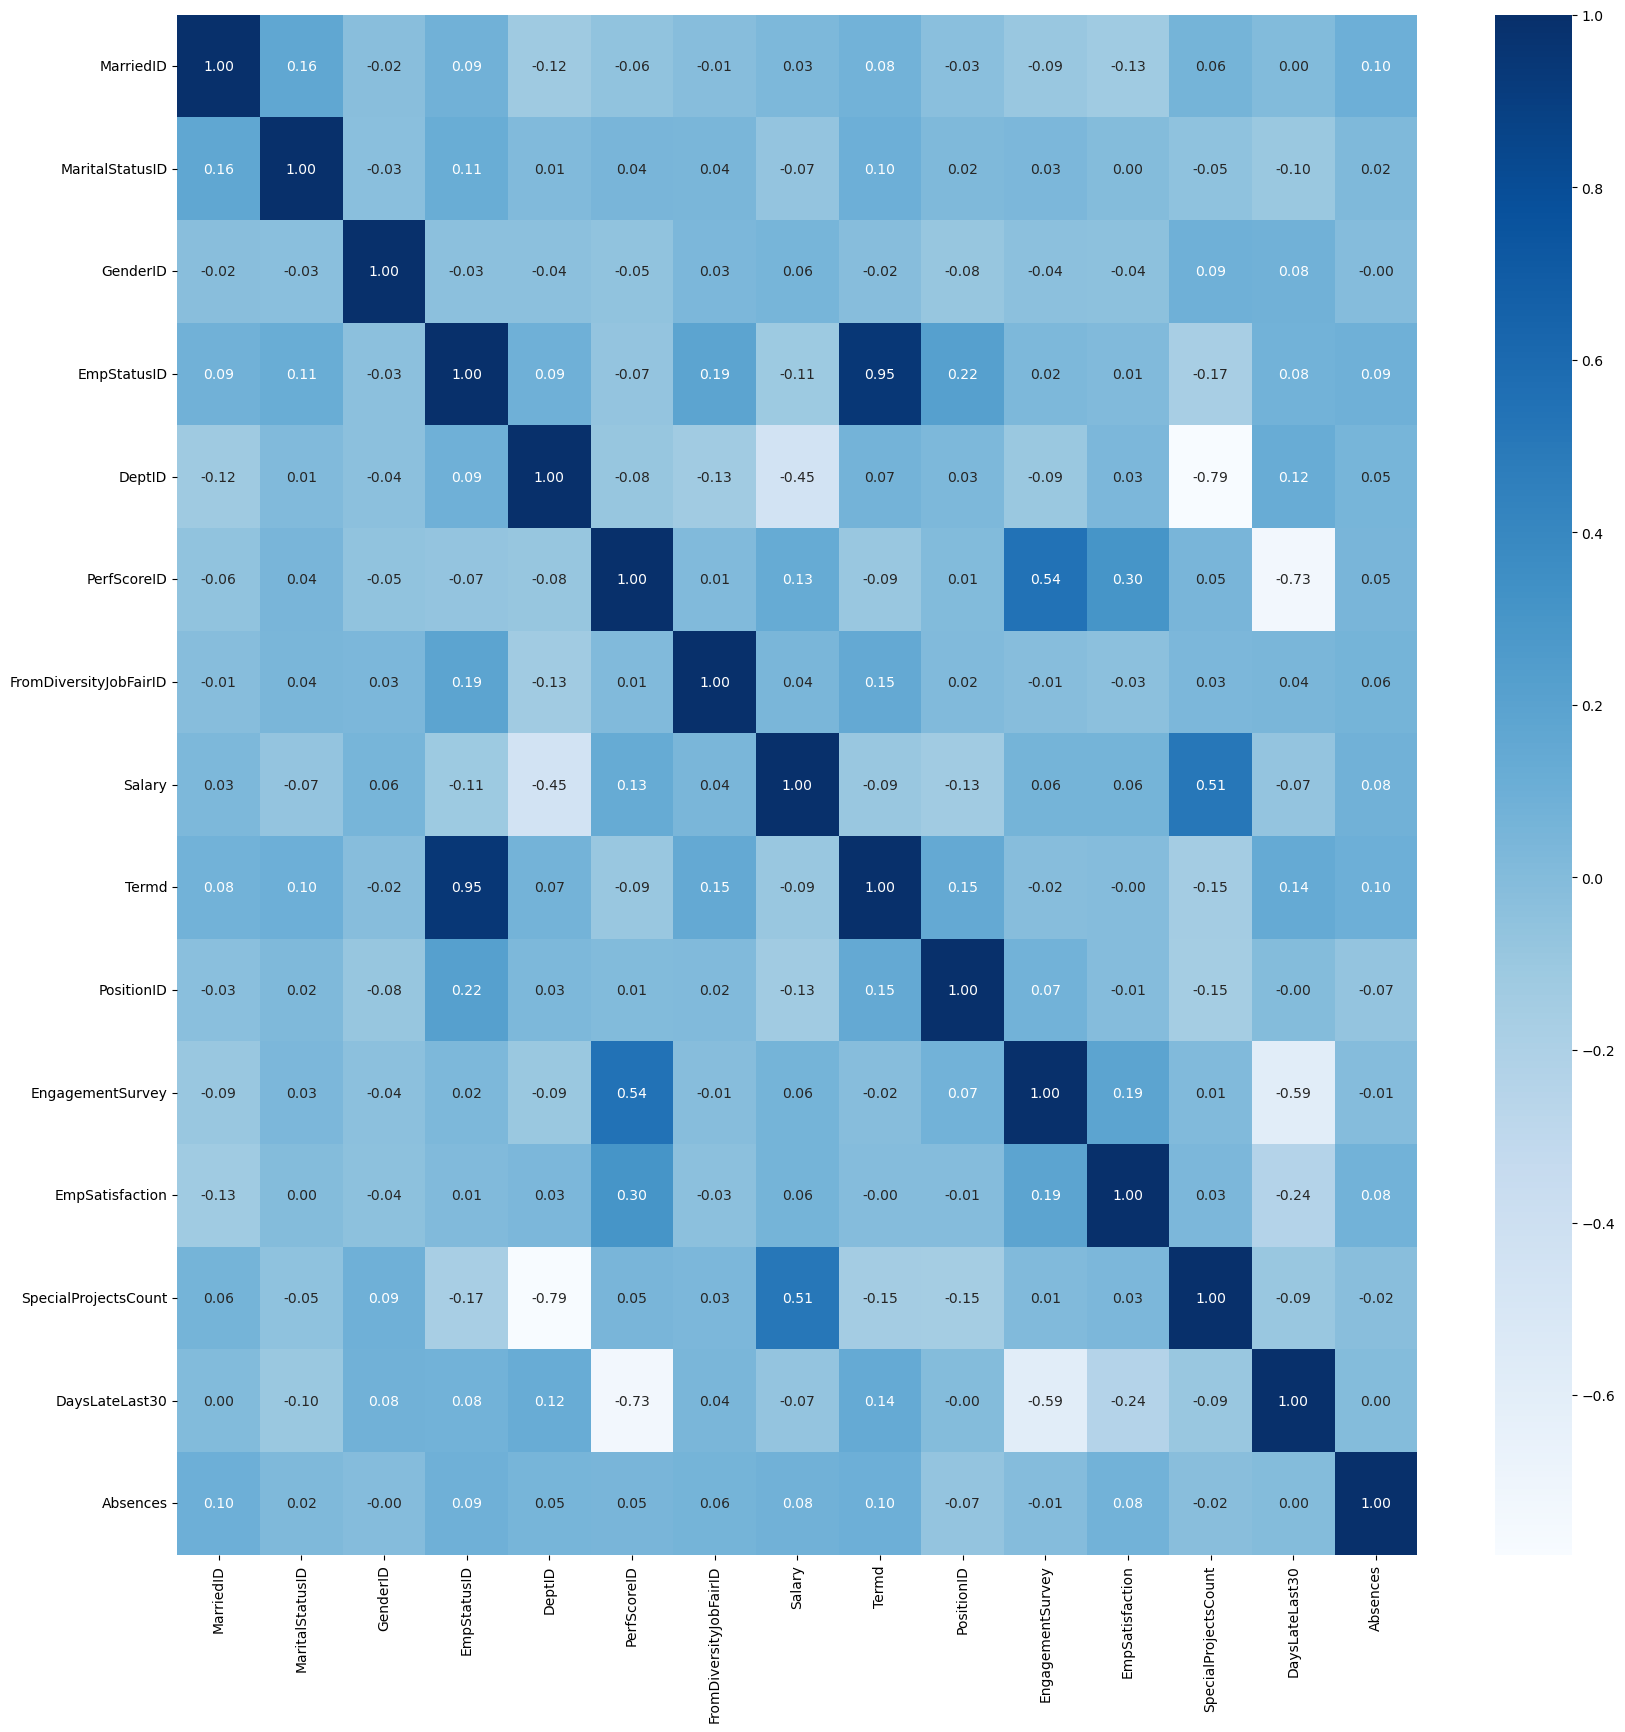

In [16]:
# Sprawdzenie zaleznosci miedzy danymi numerycznymi
plt.figure(figsize=(20, 20))
sns.heatmap(data[num].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

Interpretacja powyzszej macierzy korelacji.
Przypomnienie: Korelacja może przyjąć wartości od -1 do +1. Odchylenie skrajnie ujemne oznacza, że im wyższa jest wartość jednej zmiennej, tym niższa dla drugiej, z kolei skrajnie dodatni wynik oznacza, że obie wartości będą rosły lub malały synchronicznie. 0 wskazuje na całkowity brak związku pomiędzy zmiennymi.

Wiekszosc cech ma korelacje miedzy soba w okolicach zera, czyli nie wystepuje pomiedzy nimi ani korelacja dodatnia ani ujemna. Jednakze jest kilka wyjatkow.

Silna korelacja dodatnia: 
1. Termd ([0 1])  i EmpStatusID ([1 2 ... 5])


Umiarkowana korelacja dodatnia: 
1. EmpSatisfaction ([1 2 ... 5])  i PerfScoreID ([1 2 3 4])
2. SpecialProjectsCount ([0 1 ... 8]) i Salary ([54046 ... 250000])

Silna korelacja ujemna: 
1. SpecialProjectsCount ([0 1 ... 8]) i DeptID ([1 2 ... 6]) 
2. DaysLaterLast30 ([0 1 ... 6]) i PerfScoreID ([1 2 3 4])

Umiarkowana korelacja ujemna:
1. Salary ([54046 ... 250000]) i DeptID ([1 2 ... 6]) 
2. DaysLaterLast30 ([0 1 ... 6]) i EngagementSurvey ([1.12 ... 5]) 


Większość zmiennych numerycznych wykazuje niskie lub umiarkowane poziomy korelacji. Nie ma silnych zależności między większością tych zmiennych. Może to wskazywać na to, że każda cecha wnosi unikalne informacje do zbioru danych. Jest to korzystne dla modelowania statystycznego i predykcyjnego, ponieważ niezależne dane mogą lepiej przyczynić się do modelu.

Występująca silna korelacja dodatnia dla zmiennej 'Termd' oraz 'EmpStatusID' sugeruje, że istnieje bezpośredni związek między tymi dwoma zmiennymi. W systemach HR często status zatrudnienia pracownika jest powiązany z wewnetrznym statusem pracownika np. zakończenie pracy. Stąd, gdy pracownik zostaje zwolniony, aktualizowany jest jego status zatrudnienia jak i identyfikator zakończenia pracy.

Występująca silna korelacja ujemna dla zmiennej 'SpecialProjectCounts' oraz 'DeptID' może wynikać z tego względu, iż charakteryzuje specyfikę różnych działów w strukturze organizacji. Niektórzy pracownicy mogą być mniej zaagnażowani w projekty specjalne i wykonywać bardziej rutynową pracę.
Natomiast zmienna 'DaysLaterLast30' oraz 'PerfScoreID' sugeruje, że pracownicy, którzy spóźniają się częściej mają tendencję do niższych wyników oceny wydajności. Taka informacja jest szczególnie istotna dla działów HR, które na podstawie tych danych mogą wprowadzić zmiany dot. efektywności pracy. 

D:\Studia\Semestr_03_04\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Studia\Semestr_03_04\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Studia\Semestr_03_04\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Stud

nazwa kolumny, minimalne i maksymalne wartosci danych numerycznych
MarriedID 0 1
MaritalStatusID 0 4
GenderID 0 1
EmpStatusID 1 5
DeptID 1 6
PerfScoreID 1 4
FromDiversityJobFairID 0 1
Salary 45046 250000
Termd 0 1
PositionID 1 30
EngagementSurvey 1.12 5.0
EmpSatisfaction 1 5
SpecialProjectsCount 0 8
DaysLateLast30 0 6
Absences 1 20


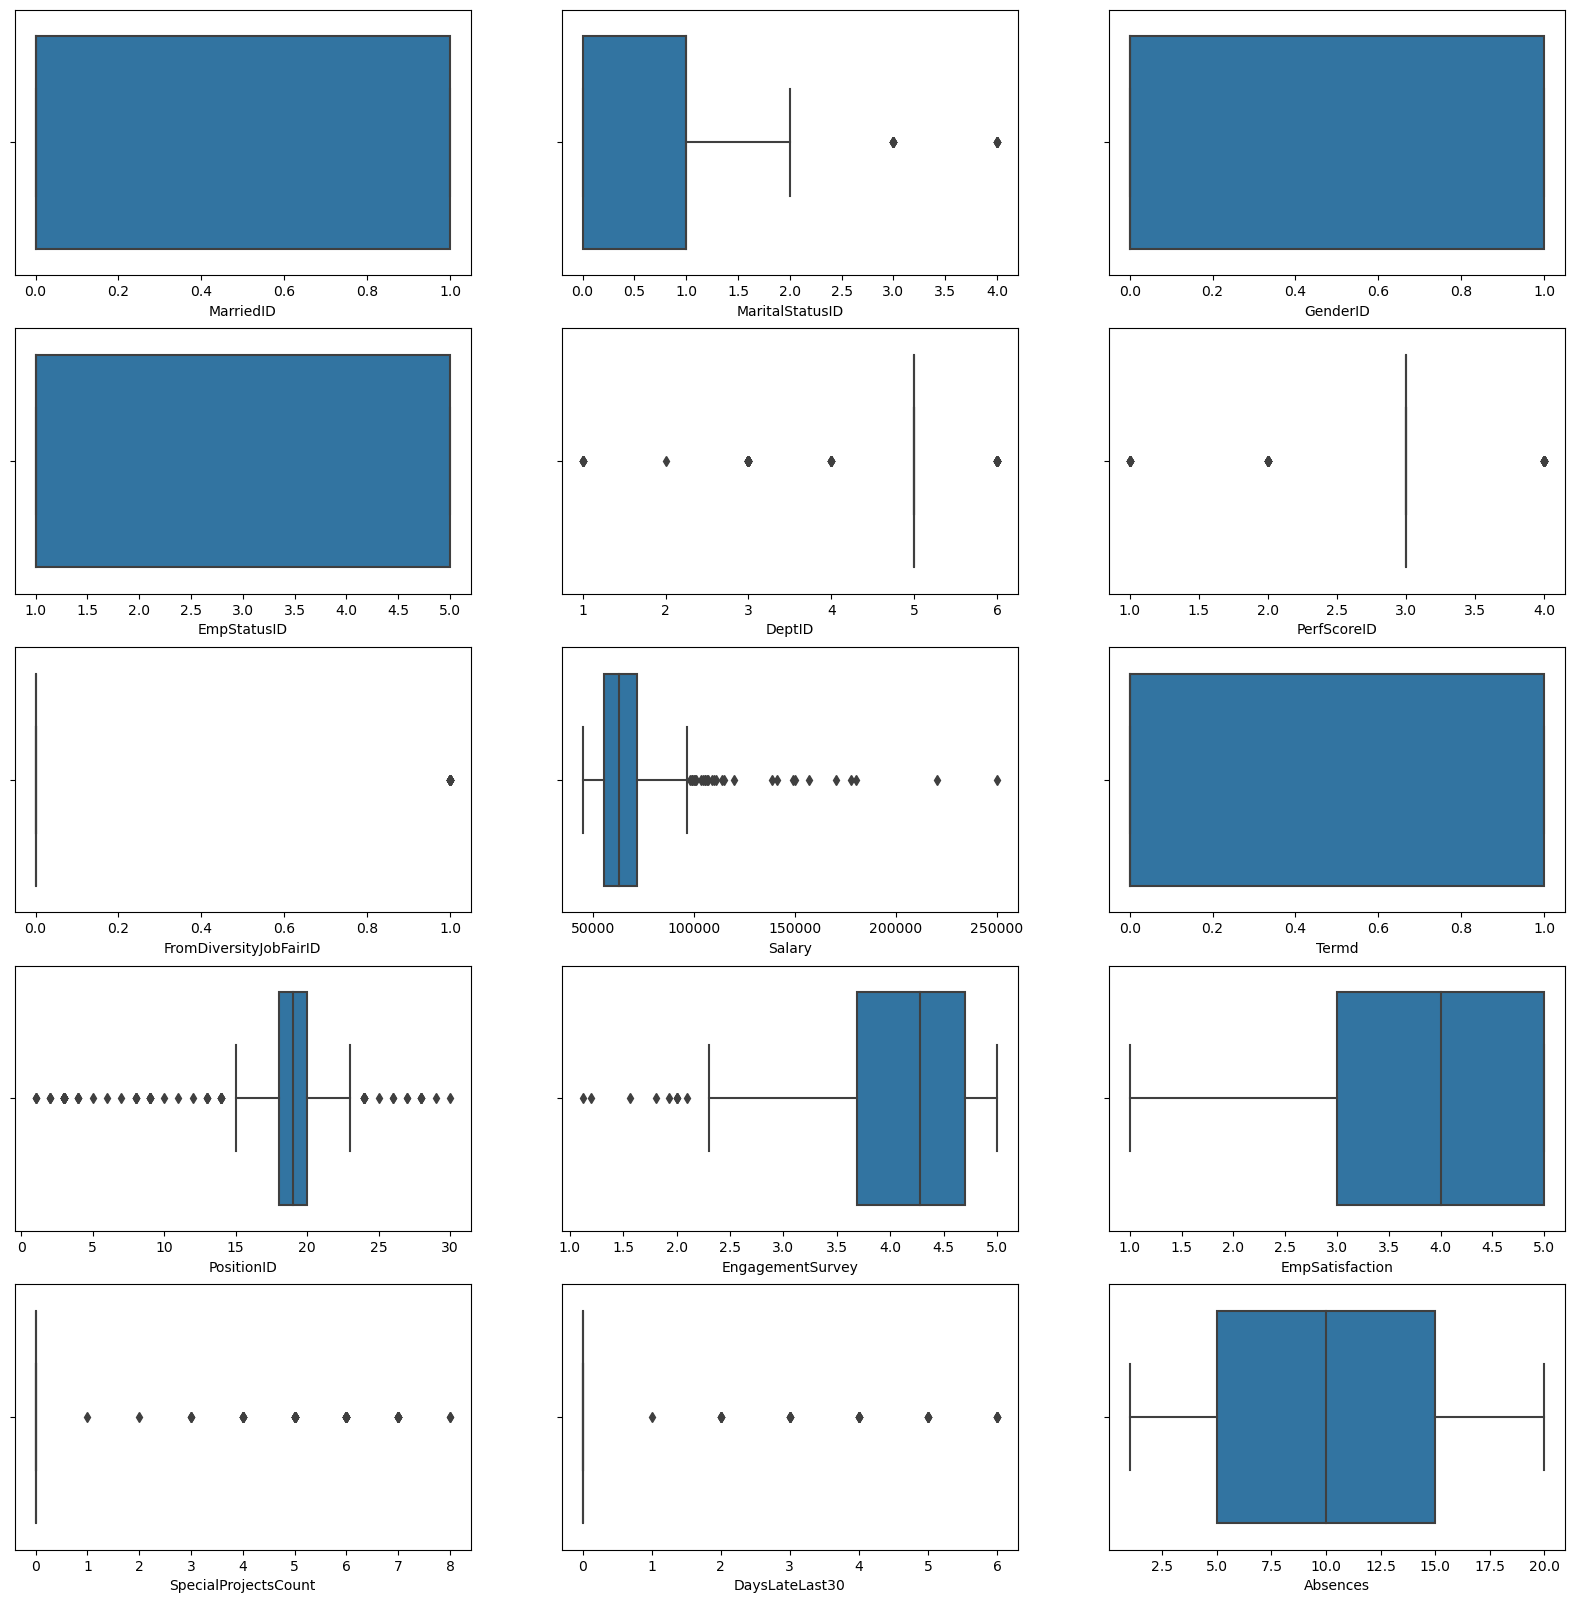

In [17]:
# Zakresy zmiennosci danych numerycznych
plt.figure(figsize=(20, 20))
for i, col in enumerate(num, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data[col])

print("nazwa kolumny, minimalne i maksymalne wartości danych numerycznych")
for col in num:
    print(col, min(data[col]), max(data[col]))

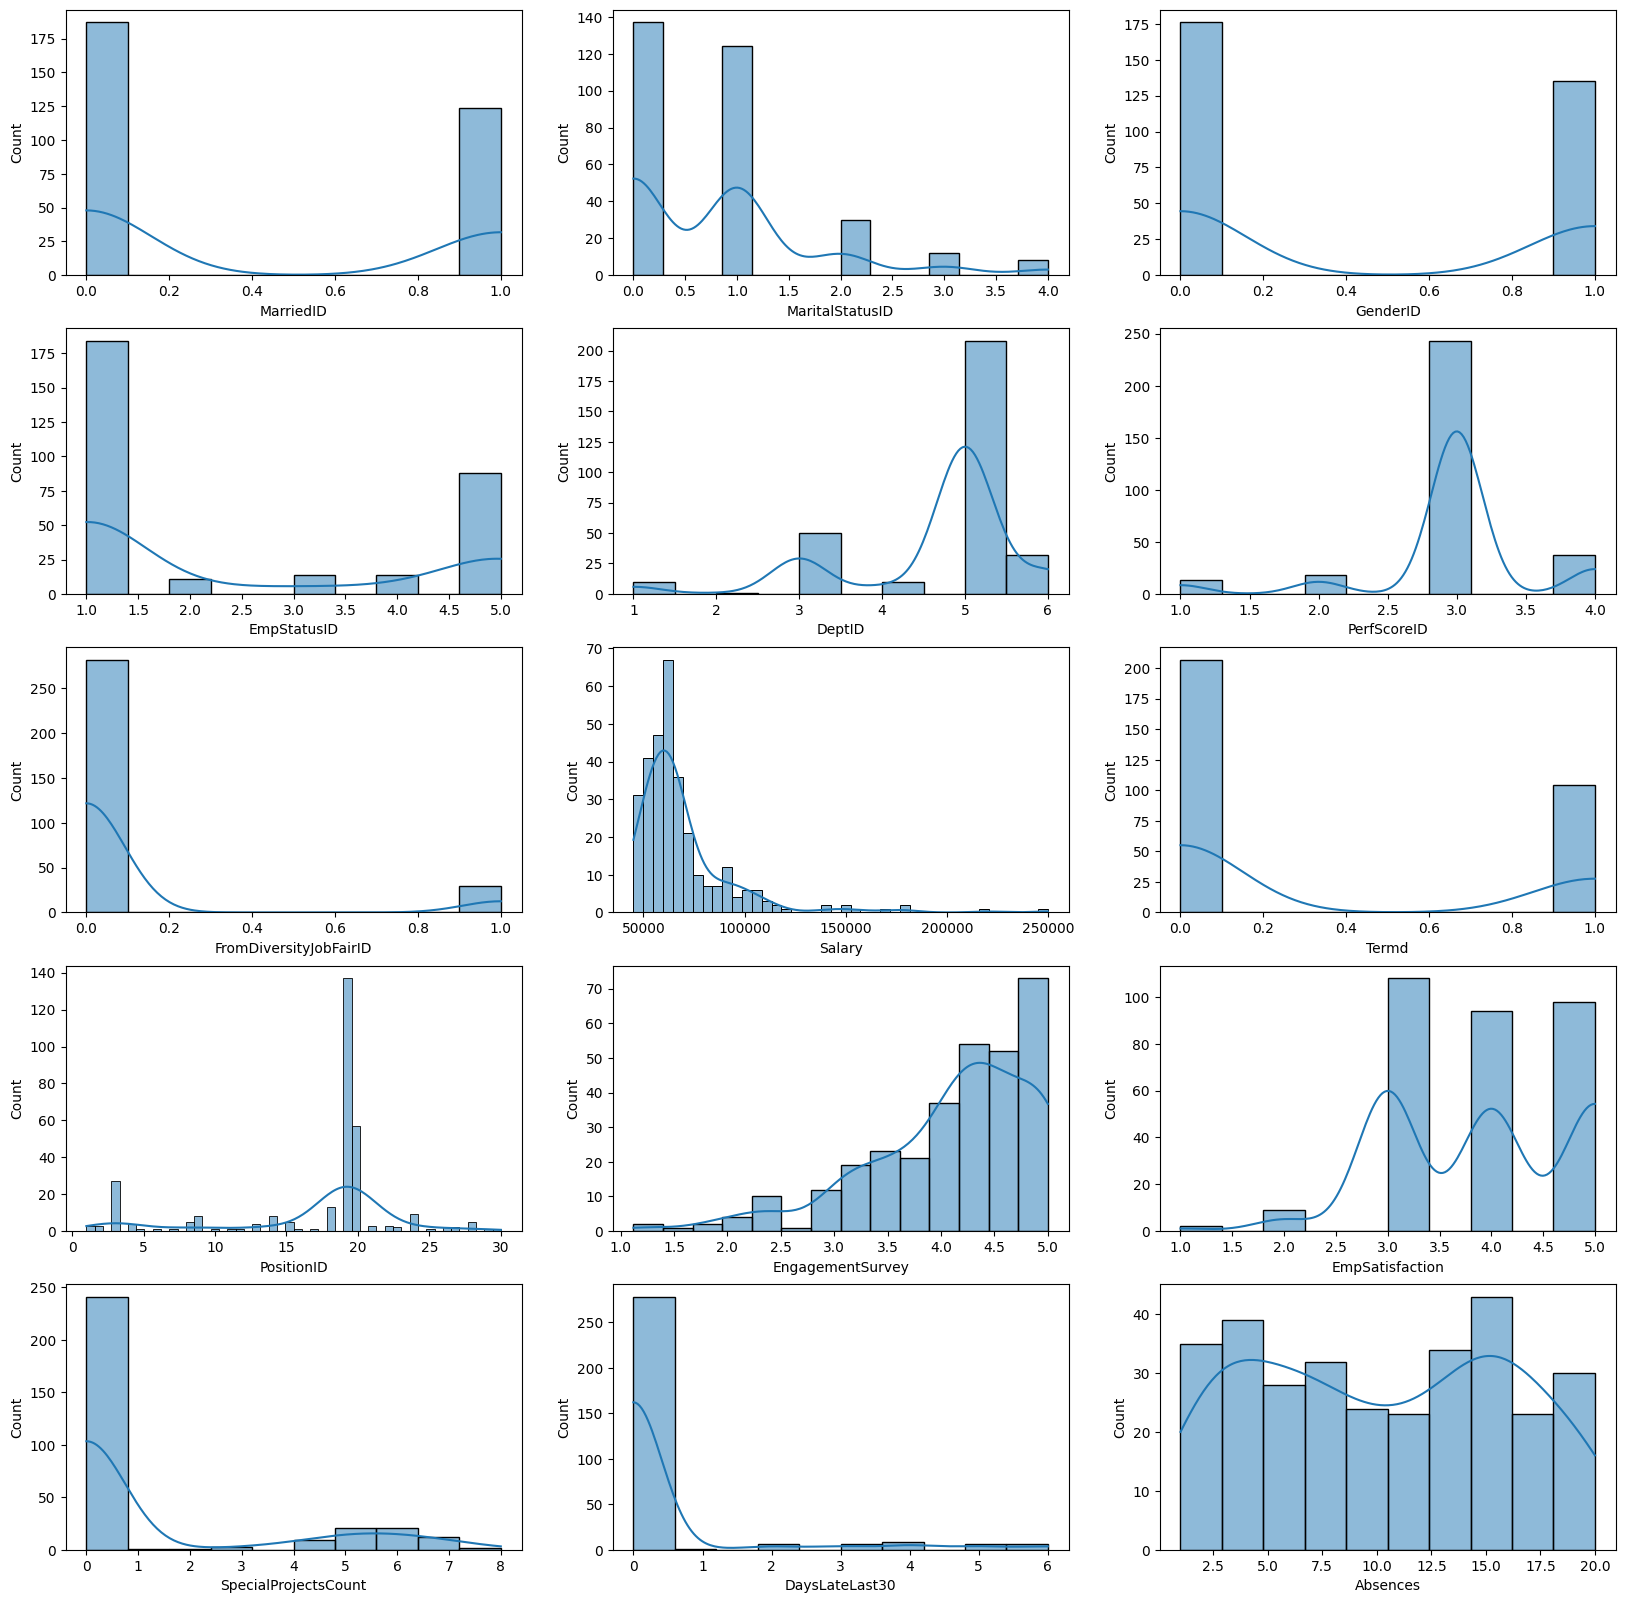

In [17]:
# Histogramy danych numerycznych with kde
plt.figure(figsize=(20, 20))
for i, col in enumerate(num, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[col], kde=True)

Interpretacja wynikow:

1. Histogramy z rozkładem zmiennych dyskretnych, takie jak identyfikatory ('EmpID', 'MarriedID', 'MartialStatusID', 'GenderID', 'EmpStatusID' itd.) Rozkłady te są równomiernie rozłozone, co wskazuje na zróżnicowanie w danych kategoriach. Jest to typowe dla danych kategorycznych zakodowanych liczbowo. 
2. Histogram wynagrodzeń z identyfikatorem 'Salary' jest przykładem rozkładu ciągłego, ze skupiskami w okolicach 65000. Odzwierciedla to rozkład rocznej pensji wśród pracowników, który jest standardowy w strukturach firm.
3. Inne rozkłady zmiennych numerycznych takie jak 'EngagementSurvey', 'EmpSatisfaction', 'DaysLateLast30' wykazują różnorodne rozkłady.
4. Potencjalne wartości odstające występują w rozkładzie zmiennej 'Salary', jeśli jednak uwzględnimi strukturę firmy możemy zakładać, że są to wartości poprawne, oznaczające pensje dyrektorów, kierowników, prezesów itd.
5. Skośność - w rozkładzie identyfikatora 'Salary' występuje prawoskośność, natomiast w 'EngagementSurvey' możemy zaobserwowac lewoskośność



Podsumowanie posiadanych zmiennych w zbiorze danych
1. Employee_Name - Nazwisko i Imie Pracownika
2. EmplID - Identyfikator Pracownika
3. MarriedID - Zmienna binarna czy pracownik jest w zwiazku malzenskim (1 oznacza ze jest)
4. MaritalStatusID - Status małżeński
5. GenderID - Zmienna binarna okreslajaca plec Pracownika (1 oznacza mezczyzne)
6. EmpStatusID - Status zatrudnienia pracownika
7. DeptID - Identyfikator działu pracownika
8. PerfScoreID - Identyfikator oceny wydajności
9. FromDiversityJobFairID - Identyfikator pochodzenia zrekrutowanego pracownika
10. Salary - Pensja
11. Termd - Zmienna opisująca status pracownika
12. PositionID - Identyfikator pozycji pracownika
13. Position - Pozycja pracownika
14. State - Stan pracownika (zamieszkania)
15. Zip - Kod pocztowy
16. DOB - Data urodzenia pracownika
17. Sex - Płeć
18. MaritalDesc - Opisowy status małżeński
19. CitizenDesc - Status obywatelstwa
20. HispanicLatino - Identyfikacja latynoska/hiszpańska
21. RaceDesc - Pochodzenie pracownika
22. DateofHire - Data zatrudnienia
23. DateofTermination - Data zakończenia pracy
24. TermReason - Powód zakończenia pracy
25. EmploymentStatus - Status zatrudnienia
26. Department - Nazwa działu
27. ManagerName - Naziwsko mendżera
28. ManagerID - Identyfikator menadżera
29. RecruitmentSource - Źródło rekrutacji
30. PerformanceScore - Ocena wydajności ['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']
31. EngagementSurvey - Wynik ankiety zaangażowania
32. EmpSatisfaction - Poziom zadowolenia
33. SpecialProjectsCount - Liczba projektów specjalnych
34. LastPerformanceReview_Date - Data ostatniej oceny aktywności
35. DaysLateLast30 - Liczba spóźnień w ciągu 30 dni
36. Absences - Liczba dni nieobecności



<h1>Analiza stopnia wypełnienia danych</h1>

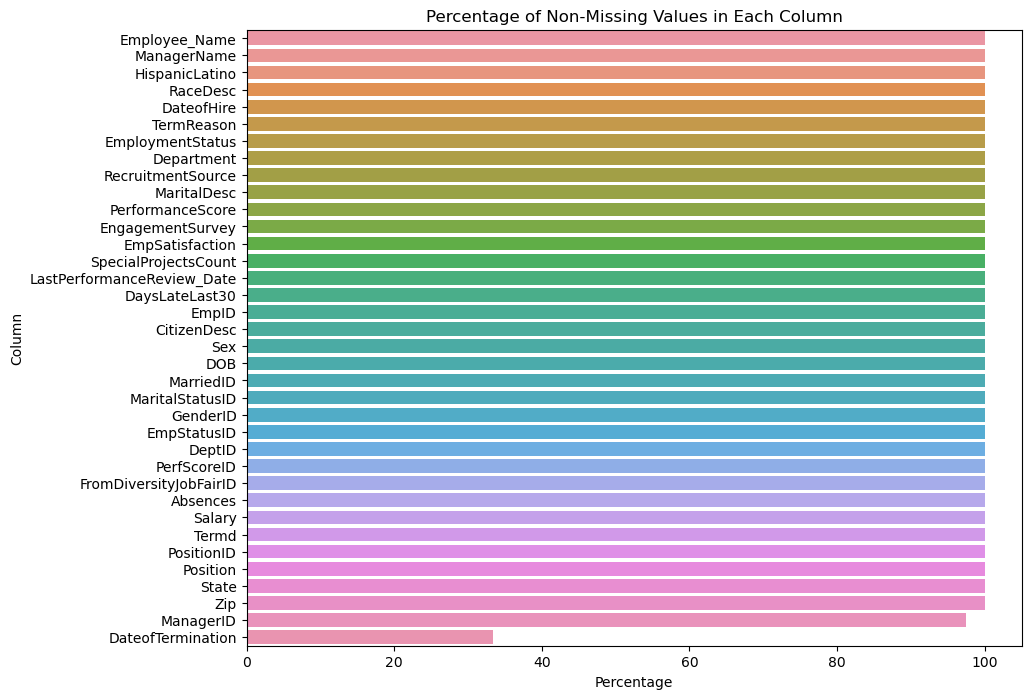

,Column,Non-Missing Values,Percentage
Employee_Name,Employee_Name,311,100.0
ManagerName,ManagerName,311,100.0
HispanicLatino,HispanicLatino,311,100.0
RaceDesc,RaceDesc,311,100.0
DateofHire,DateofHire,311,100.0
TermReason,TermReason,311,100.0
EmploymentStatus,EmploymentStatus,311,100.0
Department,Department,311,100.0
RecruitmentSource,RecruitmentSource,311,100.0
MaritalDesc,MaritalDesc,311,100.0


In [36]:
non_null_counts = data.count()
non_missing_percentage = (non_null_counts / len(data)) * 100

non_missing_df = pd.DataFrame({'Column': non_null_counts.index, 'Non-Missing Values': non_null_counts, 'Percentage': non_missing_percentage})
non_missing_df_sorted = non_missing_df.sort_values(by='Percentage', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Percentage', y='Column', data=non_missing_df_sorted)
plt.title('Percentage of Non-Missing Values in Each Column')
plt.xlabel('Percentage')
plt.ylabel('Column')
plt.show()

non_missing_df_sorted.head(15)

Z powyższej analizy wypełnienia zbioru wynika, że jedynie kolumna "DateofTermination" zawiera 207 brakujących wartości, co stanowi prawie 67% całego zbioru danych tej cechy. Jest to spodziewany wynik, ponieważ cecha ta odnosi się do daty zakończenia pracy, a większość pracowników jest nadal zatrudniona.

Poza powyższą kolumną, reszta danych jest w 100% kompletna.

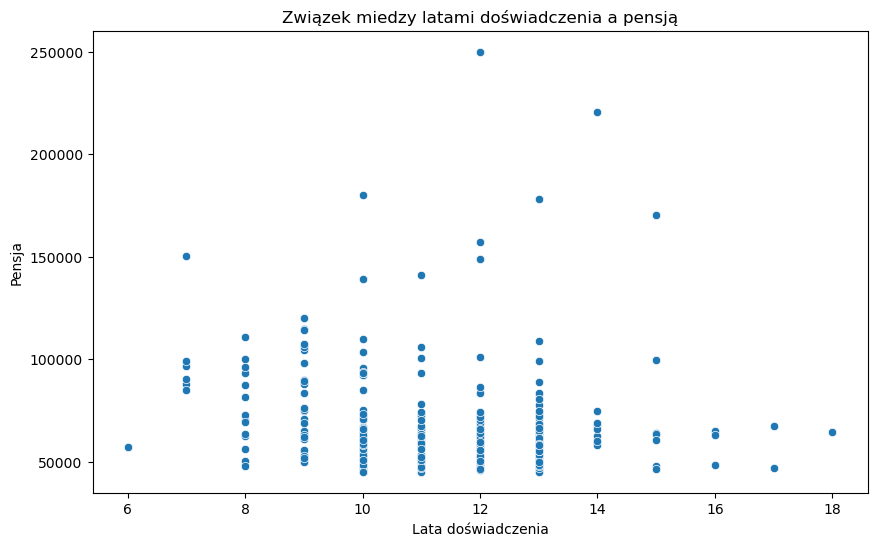

In [39]:
data['YearsOfExperience'] = pd.to_datetime('today').year - pd.to_datetime(data['DateofHire']).dt.year

# Wykres zaleznosci doswiadczenia od pensji
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsOfExperience', y='Salary', data=data)
plt.title('Związek miedzy latami doświadczenia a pensją')
plt.xlabel('Lata doświadczenia')
plt.ylabel('Pensja')
plt.show()

Wykres pokazuje, jak wynagrodzenia rozkładają się w odniesieniu do lat doświadczenia pracowników. Można zaobserwować pewną tendencję do wzrostu wynagrodzenia wraz ze wzrostem doświadczenia, co jest typowym trendem w wielu organizacjach.  Istnieje znaczne zróżnicowanie wynagrodzeń wśród pracowników z podobnym stażem pracy, co sugeruje, że inne czynniki (takie jak rola, dział, umiejętności) również wpływają na wynagrodzenie.

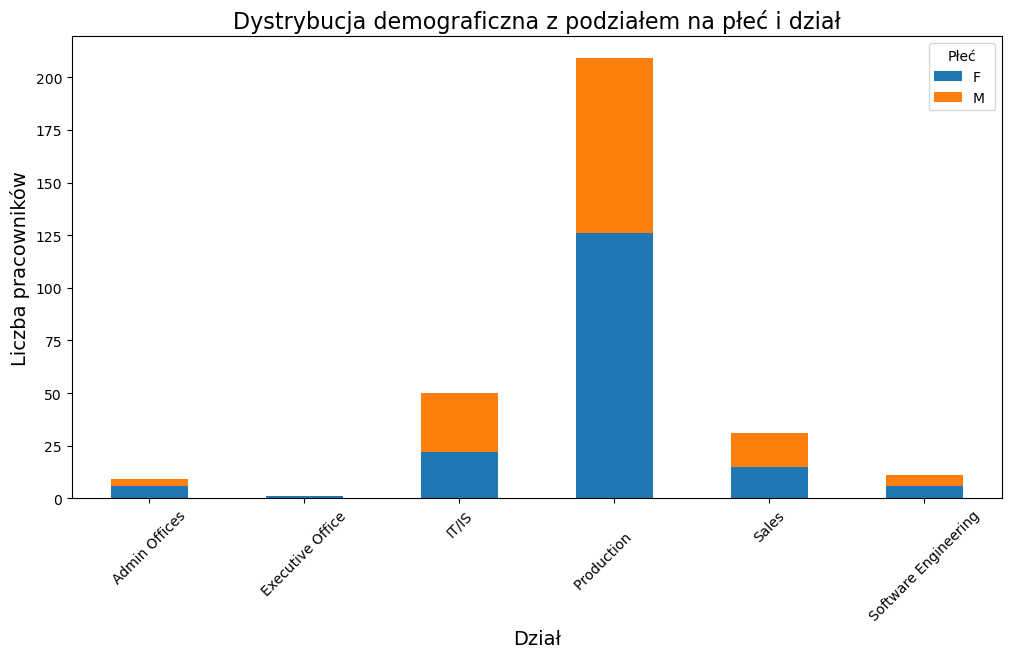

In [41]:
# Przygotowanie danych do wykresu
department_sex_counts = data.groupby(['Department', 'Sex']).size().unstack()

# Tworzenie wykresu slupkowego skumulowanego
department_sex_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Dystrybucja demograficzna z podziałem na płeć i dział', fontsize=16)
plt.xlabel('Dział', fontsize=14)
plt.ylabel('Liczba pracowników', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Płeć')
plt.show()

Wykres pokazuje rozkład liczby pracowników mężczyzn i kobiet w różnych działach organizacji. Można zaobserwować, że w niektórych działach np. Produkcja lub Dział Realizacji istnieje zróżnicowanie pod względem równowagi płci. taki rozkład może wskazywać na specyfikę pracy lub utarte, "tradycyjne" role płciowe w danych obszarach.

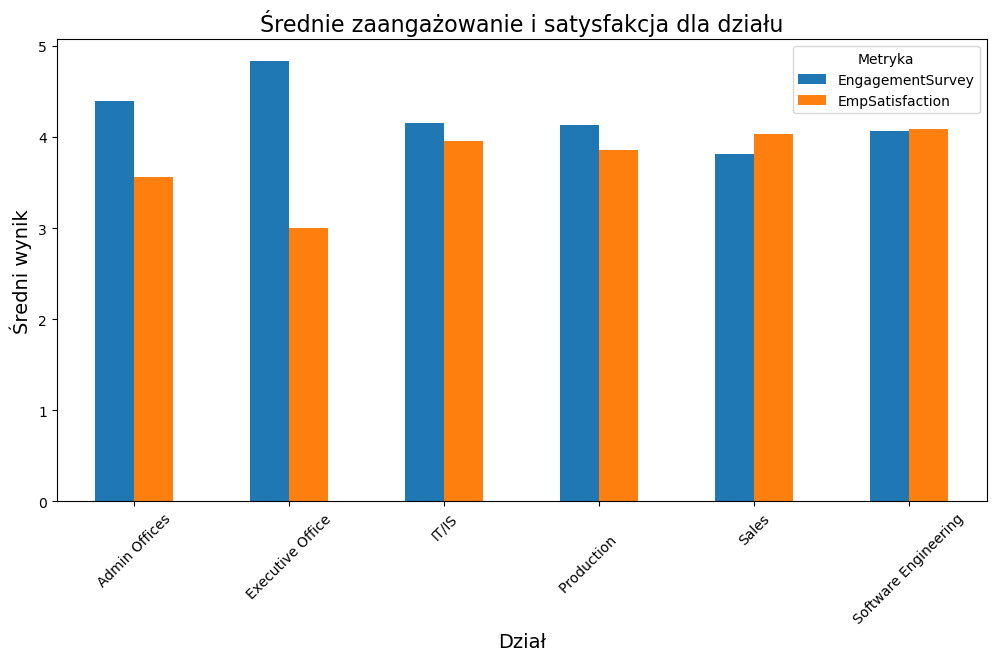

In [43]:
department_engagement = data.groupby('Department')['EngagementSurvey'].mean()
department_satisfaction = data.groupby('Department')['EmpSatisfaction'].mean()

# Przygotowanie danych do wykresu
department_analysis = pd.DataFrame({'EngagementSurvey': department_engagement, 
                                    'EmpSatisfaction': department_satisfaction})

# Tworzenie wykresu słupkowego
department_analysis.plot(kind='bar', figsize=(12, 6))
plt.title('Średnie zaangażowanie i satysfakcja dla działu', fontsize=16)
plt.xlabel('Dział', fontsize=14)
plt.ylabel('Średni wynik', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metryka')
plt.show()

W zdecydowanej większości działów zaangażowanie i satysfakcja są na zbliżonym poziomie, podczas gdy w działach administracji i realizacji są one dość mocno od siebie różne. Wykres ten może pomóc w identyfikacji działów, które mogą skorzystać z programów rozwojowych, szkoleń czy inicjatyw budujących zaangażowanie, są to informacje istotne dla takich działów jak HR.

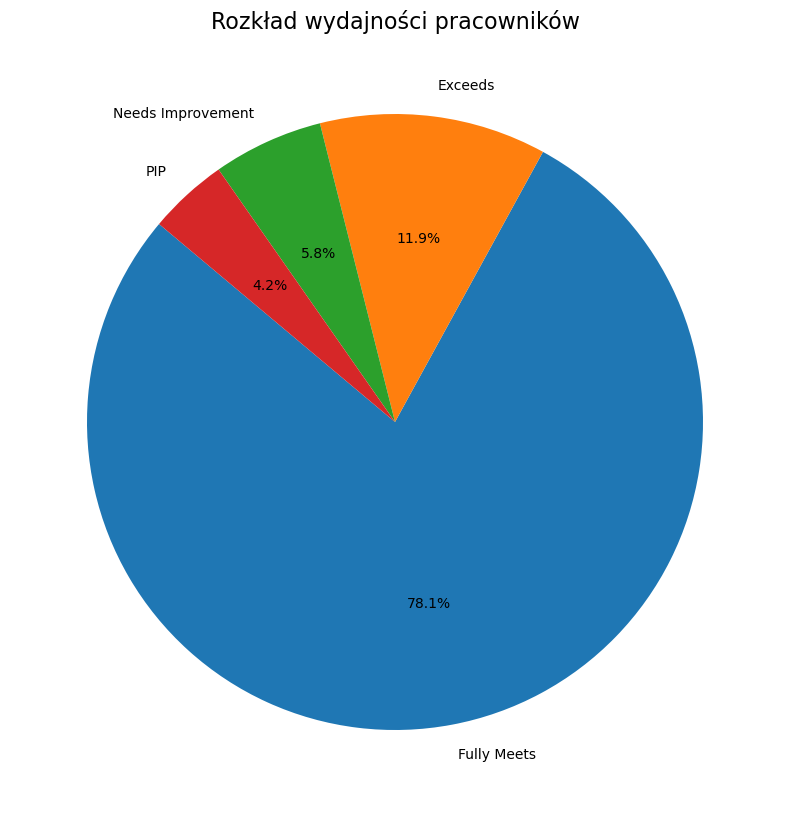

In [48]:
performance_counts = data['PerformanceScore'].value_counts()

# Tworzenie wykresu kołowego
plt.figure(figsize=(10, 10))
performance_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Rozkład wydajności pracowników', fontsize=16)
plt.ylabel('')  
plt.show()

Analizując rozkład ocen, odrazu możemy zauważyć, że większość pracowników wykazuje ogólną dobrą wydajność w organizacji. Niski odsetek rzędu 10% pracowników wykazuje niesatysfkacjonujący wynik wydajności, może to sygnalizować na potrzebę rozwoju pracowników lub lepszego zarządzania wydajnością